In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
key_title = 'title'
key_platform = 'platform'
key_score = 'score'
key_release_y = 'release_year'
key_release_m = 'release_month'
key_release_d = 'release_day'

key_rank = 'Rank'
key_genre = 'Genre'
key_publisher = 'Publisher'
key_NA = 'NA_Sales'
key_EU = 'EU_Sales'
key_JP = 'JP_Sales'
key_other = 'Other_Sales'
key_global = 'Global_Sales'

keys = [key_title, key_platform, key_score, key_release_y, key_release_m, key_release_d, key_rank, key_genre, \
            key_publisher, key_NA, key_EU, key_JP, key_other, key_global]

In [4]:
fin = open('data/our_data.csv', 'r')
file_data = csv.DictReader(fin)

data = [row for row in file_data]

In [5]:
def get_all_from_data(key, data):
    return [row[key] for row in data]

def get_unique_from_data(key, data):
    return list(set(get_all_from_data(key, data)))

genres = get_unique_from_data(key_genre, data)
platforms = get_unique_from_data(key_platform, data)
publishers = get_unique_from_data(key_publisher, data)

print(genres)
print(platforms)

['Fighting', 'Strategy', 'Adventure', 'Platform', 'Puzzle', 'Shooter', 'Action', 'Misc', 'Racing', 'Simulation', 'Role-Playing', 'Sports']
['PlayStation', 'Atari 2600', 'Nintendo 3DS', 'Dreamcast', 'Game Boy', 'Super NES', 'PlayStation Vita', 'PlayStation 2', 'PC', 'Xbox', 'NES', 'Wii', 'Saturn', 'Game Boy Color', 'Nintendo 64', 'Wii U', 'Game Boy Advance', 'Genesis', 'Nintendo DS', 'PlayStation Portable', 'Xbox One', 'Xbox 360', 'PlayStation 4', 'PlayStation 3']


In [6]:
count_per_platform_per_genre = [[0 for p in platforms] for g in genres]

for i, g in enumerate(genres):
    for row in data:
        if row[key_genre] == g:
            for j, p in enumerate(platforms):
                if row[key_platform] == p:
                    count_per_platform_per_genre[i][j] += 1

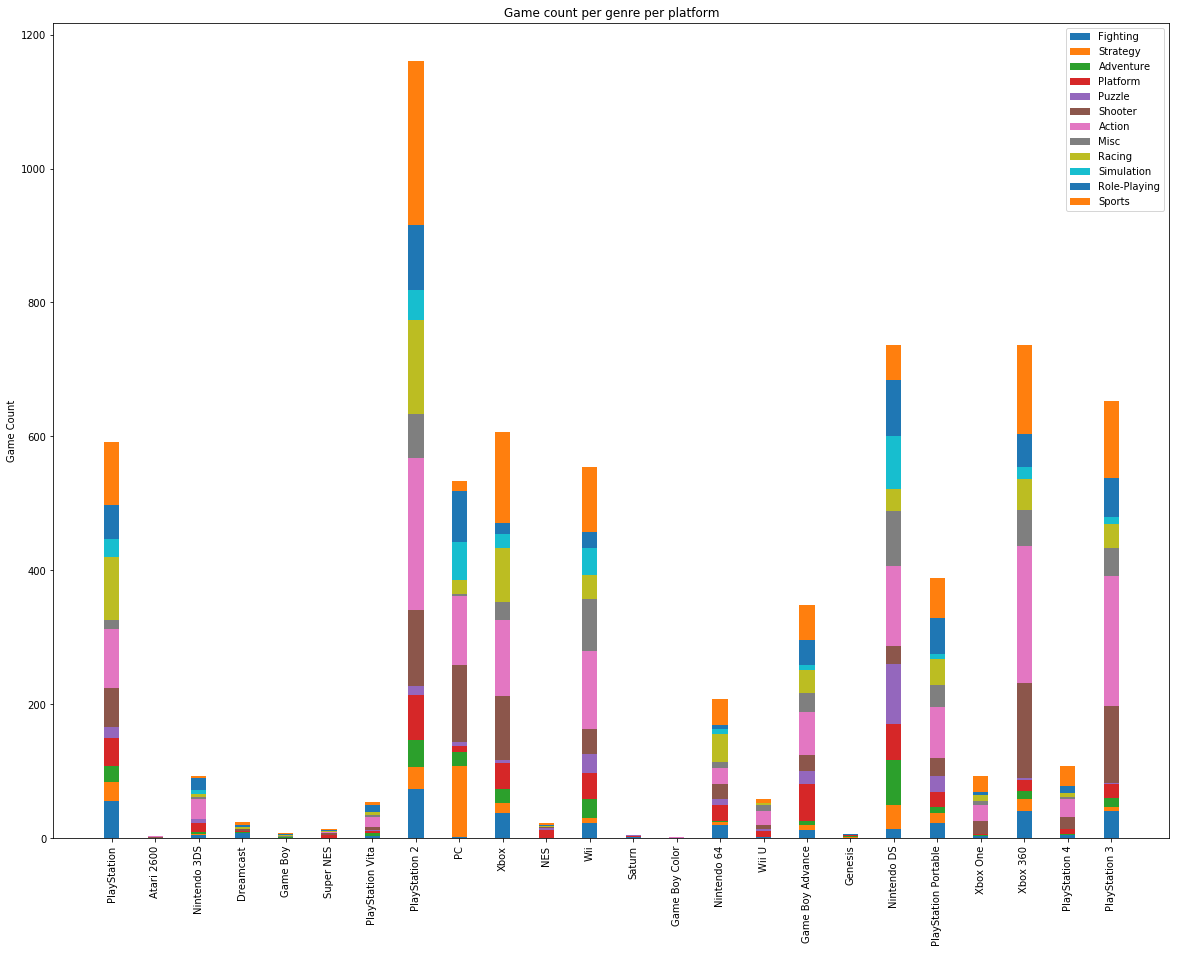

In [7]:
plots = []
plt.figure(figsize=(20, 15))
sum_so_far = [0 for platform in platforms]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(len(platforms)), count_per_platform_per_genre[i], 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_platform_per_genre[i][j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Game Count')
plt.title('Game count per genre per platform')
plt.xticks(range(len(platforms)), platforms, rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

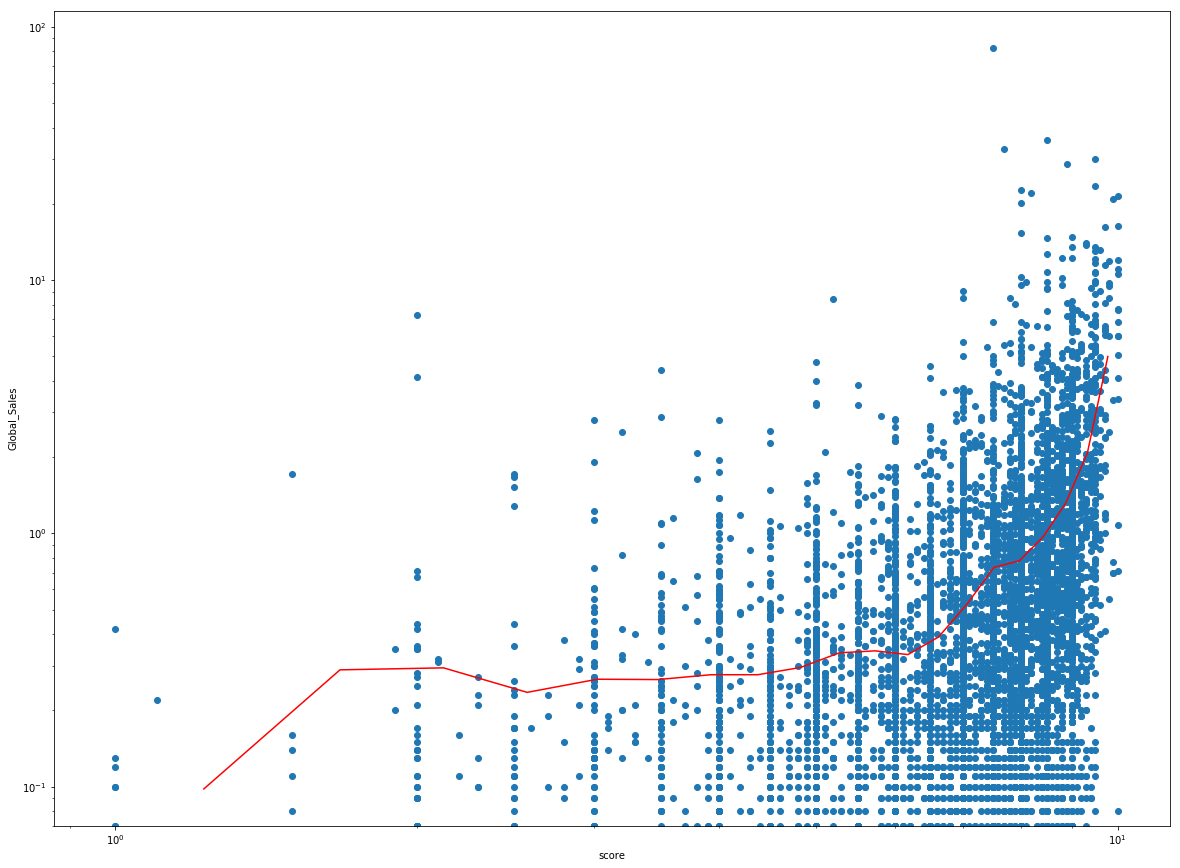

In [13]:
points = [(float(row[key_score]), float(row[key_global])) for row in data]
#points = [(float(row[key_score]), float(row[key_global])) for row in data if float(row[key_global]) < 60]
points = sorted(points, key=lambda x: x[0])
num_bins = 20
bins = [0.0 for _ in range(num_bins)]
avgs = [0.0 for _ in range(num_bins)]
for i in range(num_bins):
    mi = 1 + 9/num_bins * i
    ma = mi + 9/num_bins
    avgs[i] = mi + 1/2 * 9/num_bins
    num_in_bin = 0
    for x, y in points:
        if x >= mi and x <= ma:
            bins[i] += y
            num_in_bin += 1
    bins[i] /= num_in_bin

plt.figure(figsize=(20, 15))
plt.plot(avgs, bins, c='r')
plt.scatter([x for x, y in points], [y for x, y in points])
plt.xlabel(key_score)
plt.ylabel(key_global)
plt.yscale('log')
plt.xscale('log')
plt.show()